In [38]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [39]:
analysis = Analysis("/home/sergei/ray_results/adversarial_tune_fine")

In [40]:
target = 'policy_reward_mean/player_1'

In [42]:
df = analysis.dataframe(metric=target, mode='max')

KeyError: 'policy_reward_mean/player_1'

In [43]:
df.iloc[0]

checkpoint_rllib                  /home/sergei/ray_results/PPO_YouShallNotPassHu...
policy_reward_mean/player_1                                                 6.71429
config/lr                                                               0.000455996
config/main_filename              /scratch/sergei/better-adversarial-defenses/yo...
config/num_sgd_iter                                                         6.68122
config/redis_address                                             128.32.175.10:6379
config/rollout_fragment_length                                              4350.34
config/sgd_minibatch_size                                                   8041.54
config/train_batch_size                                                     8046.43
config/train_policies                                                    [player_1]
config/train_steps                                                         99999999
logdir                            /home/sergei/ray_results/adversarial_tune_

In [44]:
df.columns

Index(['checkpoint_rllib', 'policy_reward_mean/player_1', 'config/lr',
       'config/main_filename', 'config/num_sgd_iter', 'config/redis_address',
       'config/rollout_fragment_length', 'config/sgd_minibatch_size',
       'config/train_batch_size', 'config/train_policies',
       'config/train_steps', 'logdir'],
      dtype='object')

In [45]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target or k == 'checkpoint_rllib' or k == 'logdir'):
        del df[k]

In [46]:
df = df.sort_values(target, ascending=False)

(array([11.,  1.,  2.,  3.,  3.,  2.,  2.,  2.,  1.,  3.]),
 array([-8.7965616 , -7.24547687, -5.69439214, -4.14330741, -2.59222268,
        -1.04113795,  0.50994679,  2.06103152,  3.61211625,  5.16320098,
         6.71428571]),
 <a list of 10 Patch objects>)

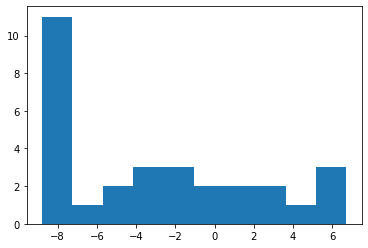

In [47]:
plt.hist(df[target])

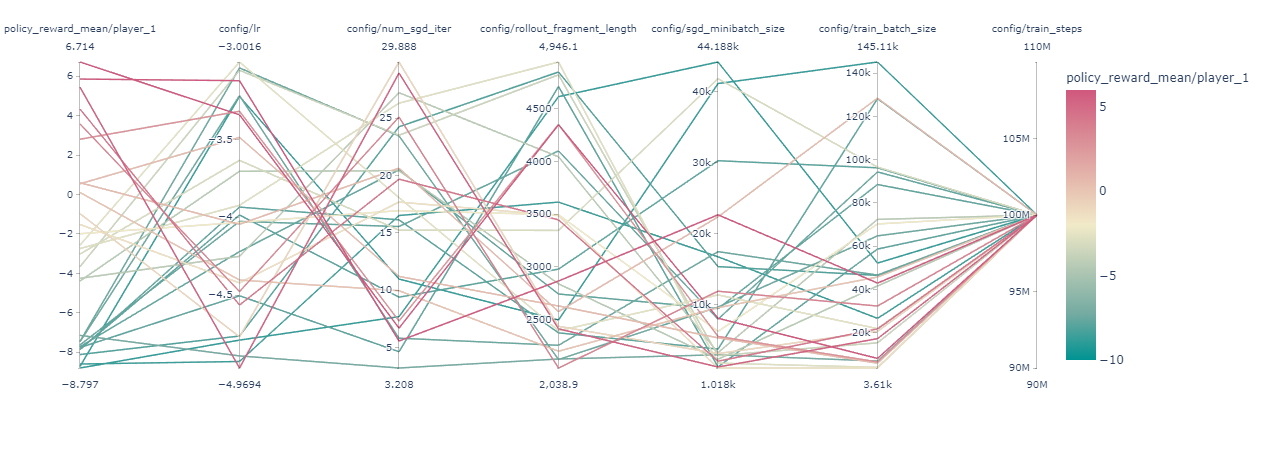

In [48]:
df1 = df.copy()
df1['config/lr'] = np.log10(df1['config/lr'])

fig = px.parallel_coordinates(df1, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2, range_color=(-10, 6))
fig.show()

In [53]:
idx = 1
best_trial = df.iloc[idx].logdir
df.iloc[idx]

checkpoint_rllib                  /home/sergei/ray_results/PPO_YouShallNotPassHu...
policy_reward_mean/player_1                                                 5.84906
config/lr                                                               0.000755454
config/main_filename              /scratch/sergei/better-adversarial-defenses/yo...
config/num_sgd_iter                                                         5.56213
config/redis_address                                             128.32.175.10:6379
config/rollout_fragment_length                                              2865.45
config/sgd_minibatch_size                                                   22627.5
config/train_batch_size                                                     42879.8
config/train_policies                                                    [player_1]
config/train_steps                                                         99999999
logdir                            /home/sergei/ray_results/adversarial_tune_

In [54]:
df

,checkpoint_rllib,policy_reward_mean/player_1,config/lr,config/main_filename,config/num_sgd_iter,config/redis_address,config/rollout_fragment_length,config/sgd_minibatch_size,config/train_batch_size,config/train_policies,config/train_steps,logdir
21,/home/sergei/ray_results/PPO_YouShallNotPassHu...,6.714286,0.000456,/scratch/sergei/better-adversarial-defenses/yo...,6.681216,128.32.175.10:6379,4350.336182,8041.544873,8046.433100,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
15,/home/sergei/ray_results/PPO_YouShallNotPassHu...,5.849057,0.000755,/scratch/sergei/better-adversarial-defenses/yo...,5.562134,128.32.175.10:6379,2865.445789,22627.467405,42879.762832,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
11,/home/sergei/ray_results/PPO_YouShallNotPassHu...,5.436242,0.000011,/scratch/sergei/better-adversarial-defenses/yo...,28.927827,128.32.175.10:6379,2410.891170,1158.166947,17172.811368,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
26,/home/sergei/ray_results/PPO_YouShallNotPassHu...,4.326923,0.000027,/scratch/sergei/better-adversarial-defenses/yo...,19.670799,128.32.175.10:6379,3446.377219,1980.057337,21693.268099,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
2,/home/sergei/ray_results/PPO_YouShallNotPassHu...,3.574297,0.000033,/scratch/sergei/better-adversarial-defenses/yo...,25.089852,128.32.175.10:6379,2038.906635,11850.547106,32255.177035,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
7,/home/sergei/ray_results/PPO_YouShallNotPassHu...,2.800000,0.000481,/scratch/sergei/better-adversarial-defenses/yo...,7.306473,128.32.175.10:6379,4352.367238,5480.487112,6411.628326,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
28,/home/sergei/ray_results/PPO_YouShallNotPassHu...,0.592034,0.000090,/scratch/sergei/better-adversarial-defenses/yo...,20.631147,128.32.175.10:6379,2574.840923,22335.162076,128388.832132,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
8,/home/sergei/ray_results/PPO_YouShallNotPassHu...,0.540541,0.000326,/scratch/sergei/better-adversarial-defenses/yo...,11.193110,128.32.175.10:6379,2628.159451,5275.039512,5815.748478,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
16,/home/sergei/ray_results/PPO_YouShallNotPassHu...,0.099668,0.000039,/scratch/sergei/better-adversarial-defenses/yo...,9.947342,128.32.175.10:6379,2198.059992,9531.807682,45689.262303,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...
17,/home/sergei/ray_results/PPO_YouShallNotPassHu...,-0.974359,0.000017,/scratch/sergei/better-adversarial-defenses/yo...,29.887756,128.32.175.10:6379,2434.825389,3052.803736,20559.005938,[player_1],99999999,/home/sergei/ray_results/adversarial_tune_fine...


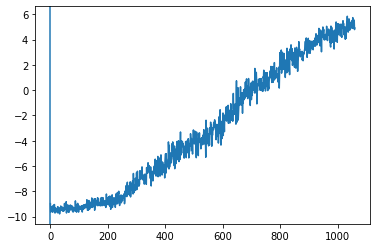

In [55]:
df_best = analysis.trial_dataframes[best_trial]
rew = df_best[target]
plt.plot(rew)
#imax = np.argmax(rew)
imax = -1
plt.axvline(imax)

In [56]:
checkpoint = df_best.checkpoint_rllib.iloc[imax]
checkpoint

'/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_23-34-36u9w51ase/checkpoint_1061/checkpoint-1061'

In [57]:
!python youshallnotpass_rllib_adversarial_makevideo.py --checkpoint {checkpoint} --no_video=True --steps 50

2020-08-17 07:37:48,051	INFO resource_spec.py:212 -- Starting Ray with 136.18 GiB memory available for workers and up to 62.37 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-17 07:37:48,174	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-17 07:37:48,445	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-17 07:37:48,929	INFO services.py:1165 -- View the Ray dashboard at localhost:8266
Args: Namespace(checkpoint='/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_23-34-36u9w51ase/checkpoint_1061/checkpoint-1061', load_normal=False, no_video=True, steps=50)
Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/a

In [165]:
!export DISPLAY=:0; python youshallnotpass_rllib_adversarial_makevideo.py --checkpoint {checkpoint}

2020-08-11 15:46:38,273	INFO resource_spec.py:212 -- Starting Ray with 103.52 GiB memory available for workers and up to 48.36 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-11 15:46:38,423	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-11 15:46:38,733	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-08-11 15:46:39,385	INFO services.py:1165 -- View the Ray dashboard at localhost:8266
Args: Namespace(checkpoint='/home/sergei/ray_results/PPO_YouShallNotPassHumans-v0_rllib_2020-08-10_21-03-15vwhtl1_3/checkpoint_1035/checkpoint-1035', load_normal=False, no_video=False, steps=10)
Creating agent humanoid_blocker
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /scratch/sergei/better-adversarial-defenses/multiagent-competition/gym_compete/new_envs/

In [107]:
#video = _
video = "video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4"

In [109]:
from IPython.display import display, FileLink

local_file = FileLink(video, result_html_prefix="Click here to download: ")
display(local_file)

/scratch/sergei/better-adversarial-defenses/video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4

In [97]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="video-20200810-063659-906f9f6d-db0e-11ea-a969-1831bf455a80/video.000000.mp4" type="video/mp4">
    </video>
""")
